### data reading 

In [1]:
df1 = pd.read_csv('../data/train.csv', parse_dates=['timestamp'])
df1['row_id'] = range(len(df1))
print(df1.shape)
df1[:3]

(909604, 17)


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,row_id
0,2021-02-19 20:18:00,816.64,834.92,31.69,"1,159.62",65.95,917.90,31.88,31.50,141.46,165.50,280.86,7.06,0.54,Turbine_108,47.58,0
1,2021-04-27 04:55:00,419.11,421.05,12.89,928.75,59.57,445.55,32.42,32.76,89.19,113.84,299.55,5.47,0.47,Turbine_18,46.07,1
2,2021-01-25 06:26:00,"1,303.53","1,337.57",16.65,"1,201.22",61.27,"1,364.72",11.45,18.33,230.62,281.45,84.96,8.09,0.62,Turbine_105,39.99,2


In [2]:
df1.isnull().any().any()

False

In [3]:
df2 = pd.read_csv('../data/new/test.csv')
print(df2.shape)
df2[:3]

(303202, 14)


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.51,19.96,40.23,410.54,57.36,84.01,48.83,45.36,2.42,1.47,156.40,2.44,0.79,Turbine_14
1,472.58,478.37,12.31,965.08,51.80,492.53,27.46,24.05,96.15,119.38,56.44,5.90,0.54,Turbine_19
2,447.83,451.16,29.11,948.04,60.49,393.15,39.41,35.72,90.25,117.19,224.54,5.92,0.51,Turbine_14


In [4]:
df2.isnull().any().any()

False

### slide 3 

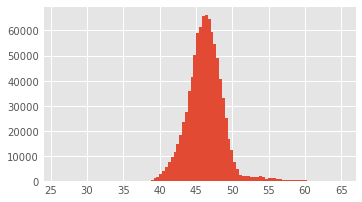

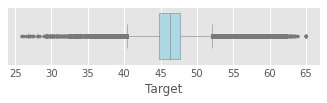

In [5]:
plt.style.use('ggplot')
_ = df1.Target.hist(figsize = (5,3), bins = 100)
_, ax = plt.subplots(figsize = (5,1))
_ = sns.boxplot(x=df1["Target"], color = 'lightblue', ax = ax, linewidth=0.5, saturation=1, fliersize = 2,)

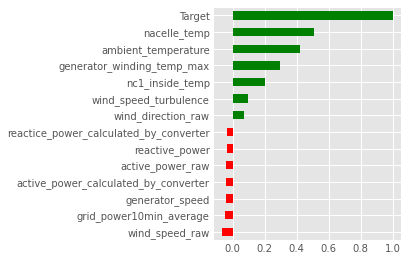

In [6]:
df_corr = df1.corr()
df_corr.columns = df_corr.columns.astype(str)

df_corr1 = df_corr['Target'][:-1].sort_values()
list_colors = ['red' if f < 0 else 'green' for f in df_corr1] 
_ = df_corr1.plot(kind = 'barh', figsize = (3,4), color = list_colors)

In [7]:
# {f:str(i)+' '+f for i,f in enumerate(sorted(df1.turbine_id.unique()))}
dict_repl = {
 'Turbine_01': '0 Turbine_01',
 'Turbine_10': '1 Turbine_10',
 'Turbine_103': '2 Turbine_103',
 'Turbine_105': '3 Turbine_105',
 'Turbine_108': '4 Turbine_108',
 'Turbine_120': '5 Turbine_120',
 'Turbine_123': '6 Turbine_123',
 'Turbine_13': '7 Turbine_13',
 'Turbine_139': '8 Turbine_139',
 'Turbine_14': '9 Turbine_14',
 'Turbine_15': '10 Turbine_15',
 'Turbine_158': '11 Turbine_158',
 'Turbine_18': '12 Turbine_18',
 'Turbine_19': '13 Turbine_19',
 'Turbine_20': '14 Turbine_20',
 'Turbine_97': '15 Turbine_97'
}
df1['turbine_id'] = df1['turbine_id'].map(dict_repl)

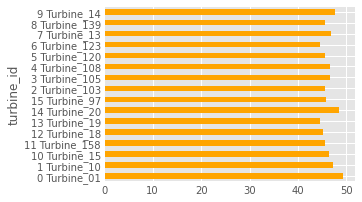

In [8]:
_ = df1.groupby('turbine_id')['Target'].mean().plot(kind = 'barh', figsize = (4,3), color = 'orange')

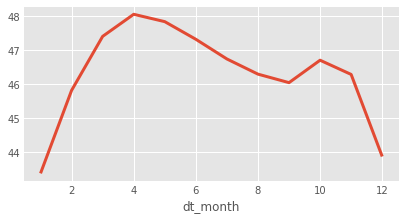

In [9]:
df1['dt_month'] = df1.timestamp.dt.month
_ = df1.groupby('dt_month')['Target'].mean().plot(figsize = (6,3), style = '-', linewidth = 3)

### slide 4

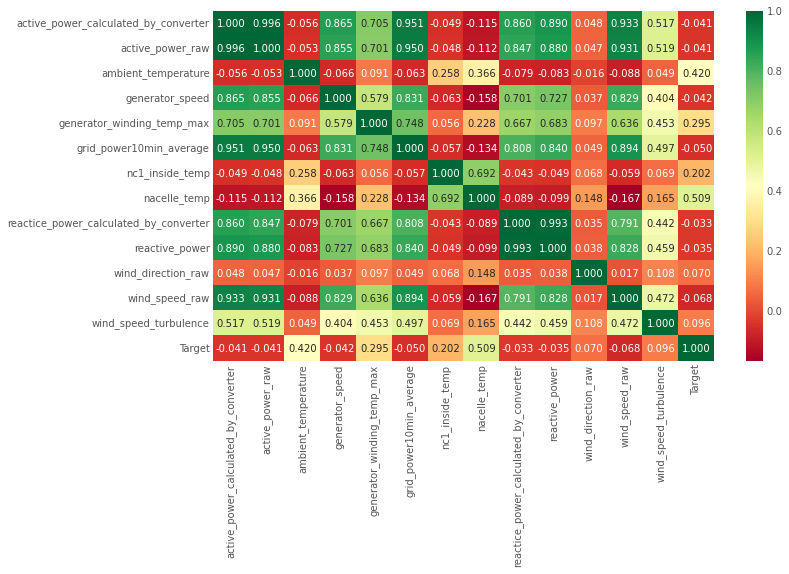

In [10]:
df_corr = df1.iloc[:,:-2].corr()
df_corr.columns = df_corr.columns.astype(str)

plt.style.use('ggplot')
_, ax = plt.subplots(figsize = (10,6))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.3f', annot_kws={"size": 10})

### slide 6

In [11]:
df = df1

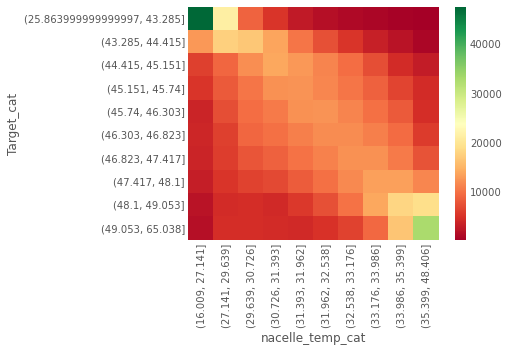

In [12]:
plt.style.use('ggplot')
for feat in ['Target','nacelle_temp']:
    df[feat + '_cat'] = pd.qcut(df[feat], q = 10)
df_corr = df.groupby(['Target_cat','nacelle_temp_cat']).size().unstack()
_, ax = plt.subplots(figsize = (5,4))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn')

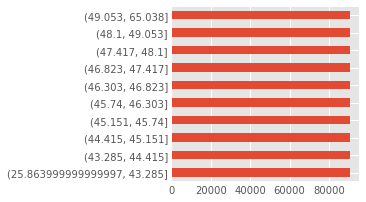

In [13]:
_ = df.Target_cat.value_counts().sort_index().plot(kind = 'barh', figsize = (3,3))

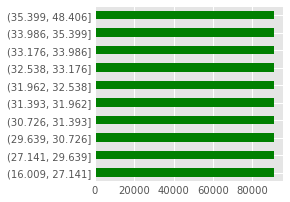

In [14]:
_ = df.nacelle_temp_cat.value_counts().sort_index().plot(kind = 'barh', figsize = (3,3), 
                                                         color = 'green')

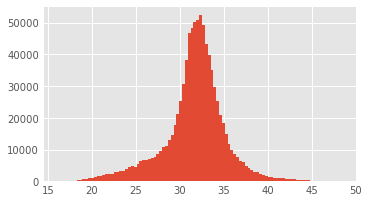

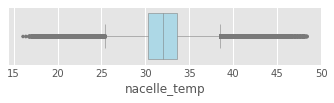

In [15]:
plt.style.use('ggplot')
_ = df1.nacelle_temp.hist(figsize = (5,3), bins = 100)
_, ax = plt.subplots(figsize = (5,1))
_ = sns.boxplot(x=df1["nacelle_temp"], color = 'lightblue', ax = ax, linewidth=0.5, saturation=1, fliersize = 2,)

### slide 7 (+ from training scripts)

In [16]:
feats_used = [
    "active_power_raw",
    "ambient_temperature",
    "generator_speed",
    "generator_winding_temp_max",
    "grid_power10min_average",
    "nc1_inside_temp",
    "nacelle_temp",
    "reactive_power",
    "wind_direction_raw",
    "wind_speed_raw",
    "wind_speed_turbulence",   
]
out1 = pd.Series(index = feats_used).fillna(0)

In [17]:
dict_meta1 = {
 0: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nacelle_temp',
  'reactive_power',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 1: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nacelle_temp',
  'wind_direction_raw'],
 2: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nacelle_temp',
  'wind_direction_raw'],
 3: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw'],
 4: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 5: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 6: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nacelle_temp',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 7: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw'],
 8: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 9: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw'],
 10: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nacelle_temp',
  'wind_direction_raw'],
 11: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'reactive_power',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 12: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nacelle_temp',
  'wind_direction_raw'],
 13: ['ambient_temperature',
  'generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw'],
 14: ['generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw',
  'wind_speed_turbulence'],
 15: ['generator_winding_temp_max',
  'grid_power10min_average',
  'nc1_inside_temp',
  'nacelle_temp',
  'wind_direction_raw']
}
out2 = list()
for k,v in dict_meta1.items():
    out2+=v
out2 = pd.Series(out2).value_counts()

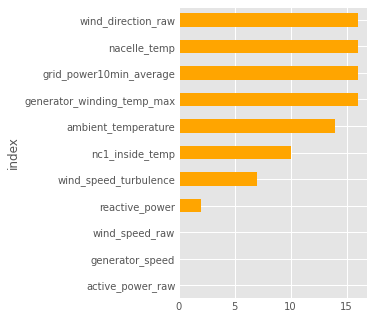

In [18]:
out3 = out1.reset_index().merge(out2.reset_index(), on = 'index', how = 'left').set_index('index')['0_y'].fillna(0).sort_values()
p = out3.plot(kind = 'barh', figsize = (3,5), color = 'orange')

### slide 8

In [47]:
plt.style.use('ggplot')

In [48]:
def ts_metrics(y_true, y_pred):
    return {
        'mae': metrics.mean_absolute_error(y_true, y_pred),
        'mse': metrics.mean_squared_error(y_true, y_pred),
        'mape': np.mean(np.abs((y_true - y_pred) / y_true)),
        'smape': np.mean(np.abs( 2*(y_true - y_pred) / (y_true+np.abs(y_pred)))),
    }

In [49]:
df_out = pd.read_csv('../output/valid_main.csv')
del df_out['turbine_id.1']
print(df_out.shape)
df_out[:3]

(302784, 4)


,row_id,turbine_id,Target,pred
0,76,14,46.35,45.92
1,92,14,47.57,46.64
2,137,14,56.08,55.35


In [50]:
df_out = df1[['row_id','dt_month']].merge(df_out)
print(df_out.shape)
df_out[:3]

(302784, 5)


,row_id,dt_month,turbine_id,Target,pred
0,2,1,3,39.99,40.06
1,3,10,10,46.06,46.06
2,4,3,0,54.35,54.20


In [51]:
for f in ['pred']:
    df_out['mape_'+f] = (df_out.Target - df_out[f]) / df_out.Target
    df_out['mape_'+f] = df_out['mape_'+f].map(abs)
print(df_out.shape)
df_out[:3]

(302784, 6)


,row_id,dt_month,turbine_id,Target,pred,mape_pred
0,2,1,3,39.99,40.06,0.00
1,3,10,10,46.06,46.06,0.00
2,4,3,0,54.35,54.20,0.00


In [52]:
dict_repl0 = {
    0: '0 Turbine_01',
    1: '1 Turbine_10',
    2: '2 Turbine_103',
    3: '3 Turbine_105',
    4: '4 Turbine_108',
    5: '5 Turbine_120',
    6: '6 Turbine_123',
    7: '7 Turbine_13',
    8: '8 Turbine_139',
    9: '9 Turbine_14',
    10: '10 Turbine_15',
    11: '11 Turbine_158',
    12: '12 Turbine_18',
    13: '13 Turbine_19',
    14: '14 Turbine_20',
    15: '15 Turbine_97',
}

In [53]:
df_out['turbine_id'] = df_out['turbine_id'].map(dict_repl0)

In [54]:
df_out.dtypes

row_id          int32
dt_month        int64
turbine_id     object
Target        float64
pred          float64
mape_pred     float64
dtype: object

In [55]:
# 100*df_out.mean()

In [56]:
feats = [v for k,v in dict_repl.items()]

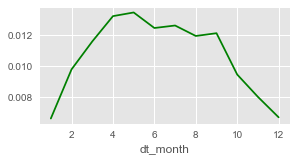

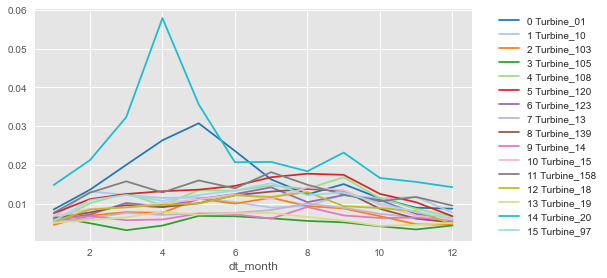

In [57]:
_ = df_out.groupby('dt_month').mape_pred.mean().plot(figsize = (4,2), color = 'green')
_ = df_out.groupby(['dt_month','turbine_id']).mape_pred.mean().unstack()[feats].plot(cmap = 'tab20', figsize = (7,4))
_ = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

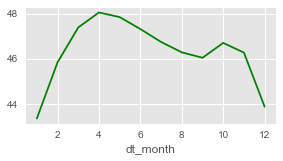

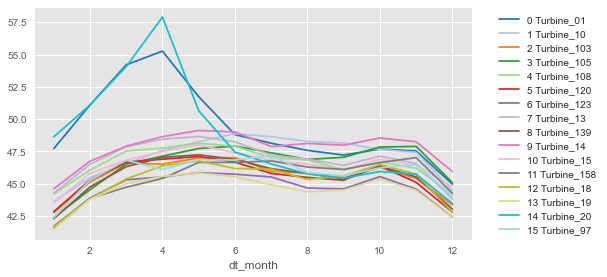

In [58]:
_ = df_out.groupby('dt_month').Target.mean().plot(figsize = (4,2), color = 'green')
_ = df_out.groupby(['dt_month','turbine_id']).Target.mean().unstack()[feats].plot(cmap = 'tab20', figsize = (7,4))
_ = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

### slide 9

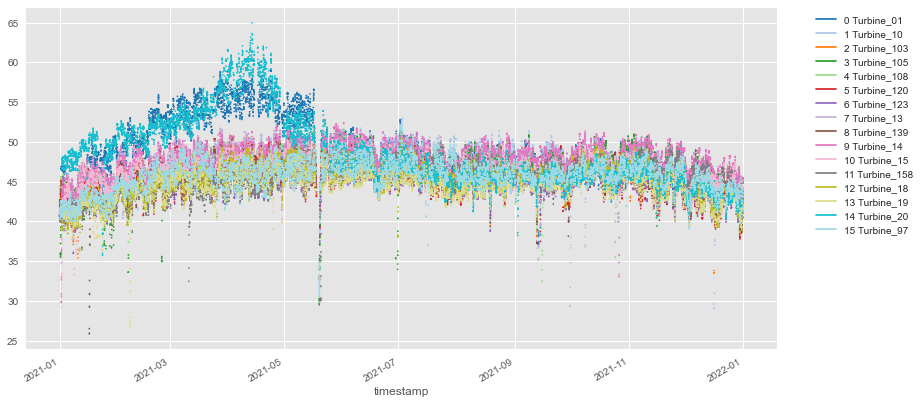

In [59]:
feats = [v for k,v in dict_repl.items()]
df11 = pd.pivot_table(df1, index = 'timestamp', columns = 'turbine_id', values = 'Target')[feats]
_ = df11.plot(kind = 'line', figsize = (12,7), cmap = 'tab20')
_ = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

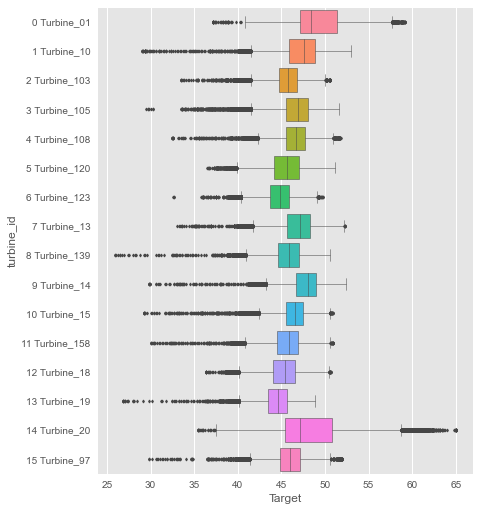

In [62]:
plt.style.use('ggplot')
_, ax = plt.subplots(figsize = (6,8))
_ = sns.boxplot(x=df1["Target"], y=df1["turbine_id"], order = [v for k,v in dict_repl.items()], ax = ax, linewidth=0.5, saturation=1, fliersize = 2,)

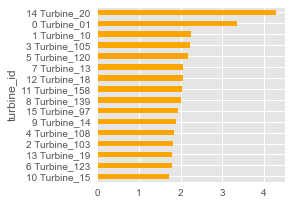

In [66]:
_ = df1.groupby('turbine_id')['Target'].std().sort_values().plot(kind = 'barh', figsize = (3,3), color = 'orange')

### slide 10

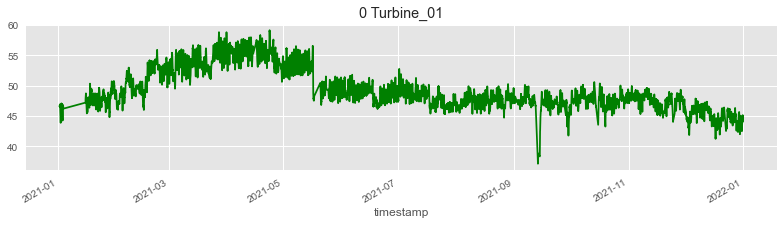

In [89]:
%matplotlib inline
plt.style.use('ggplot')
t = '0 Turbine_01'

f1 = df1.turbine_id == t
df2 = df1[f1].set_index('timestamp').sort_index()
_ = df2.Target.plot(figsize = (12,3), title = t, color = 'green')

In [94]:
df2['dt1'] = df2.index
df2['dt_prev1'] = df2.dt1.shift(1)
df2['dt_diff'] = df2.dt1 - df2.dt_prev1
df2['dt_diff'] = df2['dt_diff'].dt.total_seconds() // 60
df2[:3]

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,row_id,dt_month,Target_cat,nacelle_temp_cat,dt1,dt_prev1,dt_diff
timestamp,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 20:27:00,716.15,738.39,12.83,"1,113.62",52.25,643.02,30.48,24.79,140.67,174.03,51.83,7.35,0.32,0 Turbine_01,46.68,175252,1,"(46.303, 46.823]","(16.009, 27.141]",2021-01-01 20:27:00,NaT,nan
2021-01-01 20:30:00,668.48,691.60,12.83,"1,089.89",52.11,660.63,30.43,24.77,135.84,169.28,50.50,7.61,0.30,0 Turbine_01,46.65,879252,1,"(46.303, 46.823]","(16.009, 27.141]",2021-01-01 20:30:00,2021-01-01 20:27:00,3.00
2021-01-01 20:35:00,619.72,637.73,12.80,"1,061.76",52.67,658.61,30.29,24.65,125.42,159.78,51.73,7.15,0.31,0 Turbine_01,46.65,818271,1,"(46.303, 46.823]","(16.009, 27.141]",2021-01-01 20:35:00,2021-01-01 20:30:00,5.00


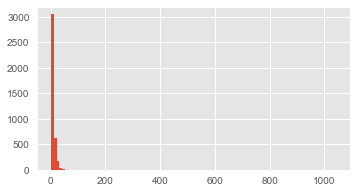

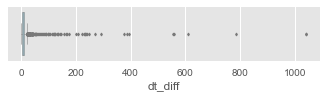

In [104]:
plt.style.use('ggplot')
f1 = df2.index > '2021-02-01'
f2 = df2.index < '2021-03-01'
filt = f1&f2
_ = df2[filt].dt_diff.hist(figsize = (5,3), bins = 100)
_, ax = plt.subplots(figsize = (5,1))
_ = sns.boxplot(x=df2[filt]["dt_diff"], color = 'lightblue', ax = ax, linewidth=0.5, saturation=1, fliersize = 2,)

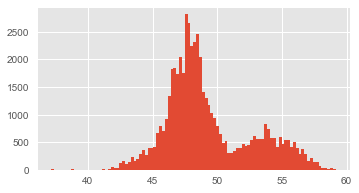

In [90]:
_ = df2.Target.hist(figsize = (5,3), bins = 100)